<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Lab: Interactive Visual Analytics with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [3]:
pip install numpy pandas seaborn scikit-learn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.0 MB 9.1 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 9.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------- -------- 2.1/2.6 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
import sys
import subprocess
def install(packages):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + packages)
install(['folium', 'pandas'])

In [47]:
import folium
import pandas as pd

In [48]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Generating-Maps-in-Python.ipynb)


In [54]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_sites_df = pd.read_csv(io.StringIO(response.text))

center_lat = spacex_sites_df['Lat'].mean()
center_lon = spacex_sites_df['Long'].mean()

launch_sites_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

marker_cluster = MarkerCluster()

for index, site in spacex_sites_df.iterrows():
    folium.Marker(
        location=[site['Lat'], site['Long']],
        popup=site['Launch Site'],
        tooltip=site['Launch Site']
    ).add_to(marker_cluster)

marker_cluster.add_to(launch_sites_map)

launch_sites_map.save('spacex_launch_sites_map.html')

launch_sites_map

First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [55]:
import requests
import pandas as pd
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'

response = requests.get(URL)

spacex_df = pd.read_csv(io.StringIO(response.text))

print(spacex_df.head())
print(spacex_df.columns)

   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

Now, you can take a look at what are the coordinates for each site.


In [56]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [57]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [58]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [59]:
center_lat = spacex_df['Lat'].mean()
center_lon = spacex_df['Long'].mean()
site_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

for index, site in spacex_df.iterrows():
    coordinate = [site['Lat'], site['Long']]
    
    circle = folium.Circle(
        coordinate, 
        radius=1000, 
        color='#d35400', 
        fill=True
    ).add_child(folium.Popup(site['Launch Site']))
    
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 12; color:#d35400;"><b>{site["Launch Site"]}</b></div>'
        )
    )
    
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


No launch sites are near the Equator. They are all situated between 28° and 35° North latitude. All launch sites are very close to coastlines

Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [61]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [62]:
marker_cluster = MarkerCluster()

*TODO:* Create a new column in `spacex_df` dataframe called `marker_color` to store the marker colors based on the `class` value


In [63]:
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: '#00FF00' if x == 1 else '#FF0000')

*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [65]:
import requests
import pandas as pd
import io
import folium
from folium.plugins import MarkerCluster

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_df = pd.read_csv(io.StringIO(response.text))

spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: '#00FF00' if x == 1 else '#FF0000')

center_lat = spacex_df['Lat'].mean()
center_lon = spacex_df['Long'].mean()
site_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

marker_cluster = MarkerCluster()

for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        popup=f"Launch Site: {record['Launch Site']}, Class: {record['class']}",
        icon=folium.Icon(color='white', icon_color=record['marker_color'])
    )
    marker_cluster.add_child(marker)

site_map.add_child(marker_cluster)
site_map.save('spacex_launch_sites_map.html')

site_map

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


Launch Site Success Rates:
              Total Launches  Success Rate
Launch Site                               
KSC LC-39A                13     76.923077
CCAFS SLC-40               7     42.857143
VAFB SLC-4E               10     40.000000
CCAFS LC-40               26     26.923077


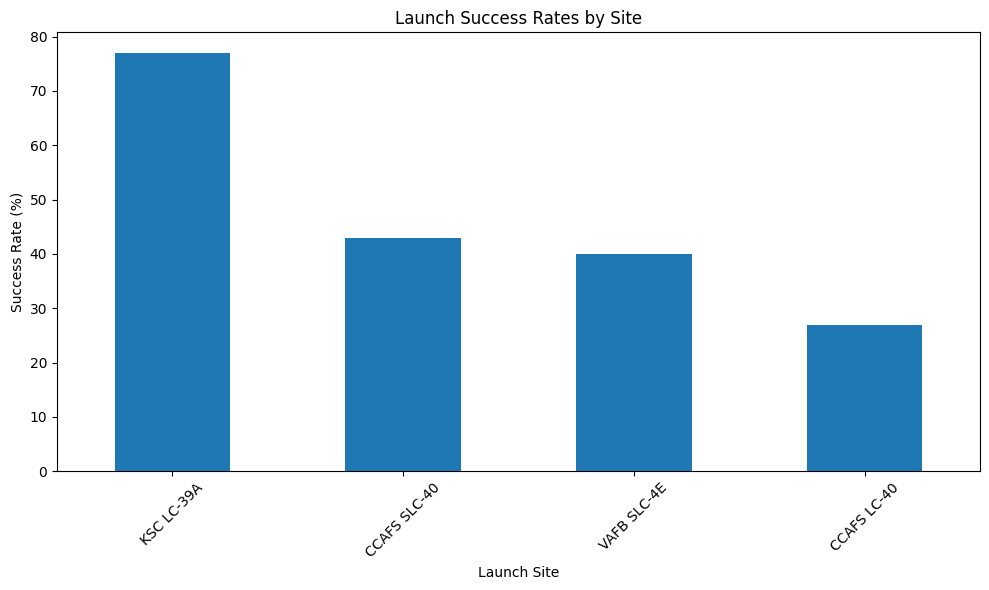

In [66]:
success_rates = spacex_df.groupby('Launch Site')['class'].agg(['count', 'mean'])
success_rates.columns = ['Total Launches', 'Success Rate']
success_rates['Success Rate'] = success_rates['Success Rate'] * 100
success_rates = success_rates.sort_values('Success Rate', ascending=False)

print("Launch Site Success Rates:")
print(success_rates)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
success_rates['Success Rate'].plot(kind='bar')
plt.title('Launch Success Rates by Site')
plt.xlabel('Launch Site')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [68]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_df = pd.read_csv(io.StringIO(response.text))

center_lat = spacex_df['Lat'].mean()
center_lon = spacex_df['Long'].mean()
site_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
site_map.add_child(mouse_position)

spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: '#00FF00' if x == 1 else '#FF0000')

marker_cluster = MarkerCluster()

for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        popup=f"Launch Site: {record['Launch Site']}, Class: {record['class']}",
        icon=folium.Icon(color='white', icon_color=record['marker_color'])
    )
    marker_cluster.add_child(marker)

site_map.add_child(marker_cluster)
site_map.save('spacex_launch_sites_map_with_mouse_position.html')

site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


In [31]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

unique_sites = spacex_df[['Launch Site', 'Lat', 'Long']].drop_duplicates()
print("Unique Launch Sites:")
print(unique_sites)

Unique Launch Sites:
     Launch Site        Lat        Long
0    CCAFS LC-40  28.562302  -80.577356
26   VAFB SLC-4E  34.632834 -120.610745
36    KSC LC-39A  28.573255  -80.646895
49  CCAFS SLC-40  28.563197  -80.576820


*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [69]:
launch_site_lat = 28.562302
launch_site_lon = -80.577356

coastline_lat = 28.56305
coastline_lon = -80.56788 


distance = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

print(f"Launch Site Coordinates: {launch_site_lat}, {launch_site_lon}")
print(f"Coastline Point Coordinates: {coastline_lat}, {coastline_lon}")
print(f"Distance to Coastline: {distance:.2f} km")

Launch Site Coordinates: 28.562302, -80.577356
Coastline Point Coordinates: 28.56305, -80.56788
Distance to Coastline: 0.93 km


*TODO:* Draw a `PolyLine` between a launch site to the selected coastline point


In [70]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_df = pd.read_csv(io.StringIO(response.text))

launch_site_lat = 28.562302
launch_site_lon = -80.577356
coastline_lat = 28.56305
coastline_lon = -80.56788 

distance = haversine_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

site_map = folium.Map(location=[spacex_df['Lat'].mean(), spacex_df['Long'].mean()], zoom_start=10)

folium.Marker(
    location=[launch_site_lat, launch_site_lon],
    popup='Launch Site',
    icon=folium.Icon(color='blue', icon='rocket')
).add_to(site_map)

folium.Marker(
    location=[coastline_lat, coastline_lon],
    popup='Coastline Point',
    icon=folium.Icon(color='green', icon='wave')
).add_to(site_map)

folium.Marker(
    location=[coastline_lat, coastline_lon],
    icon=folium.DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html=f'<div style="font-size: 12px; color:#d35400;"><b>{distance:.2f} KM</b></div>'
    )
).add_to(site_map)

folium.PolyLine(
    locations=[
        [launch_site_lat, launch_site_lon],
        [coastline_lat, coastline_lon]
    ],
    color='red',
    weight=2,
    dash_array='5'
).add_to(site_map)

print(f"Launch Site Coordinates: {launch_site_lat}, {launch_site_lon}")
print(f"Coastline Point Coordinates: {coastline_lat}, {coastline_lon}")
print(f"Distance to Coastline: {distance:.2f} km")

site_map.save('spacex_launch_site_coastline_map.html')
site_map

Launch Site Coordinates: 28.562302, -80.577356
Coastline Point Coordinates: 28.56305, -80.56788
Distance to Coastline: 0.93 km


Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


*TODO:* Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


In [73]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
response = requests.get(URL)
spacex_df = pd.read_csv(io.StringIO(response.text))

launch_site_lat = 28.562302
launch_site_lon = -80.577356

proximity_points = {
    'Cape Canaveral': {'lat': 28.38797, 'lon': -80.6054},
    'Nearest Railroad': {'lat': 28.5638, 'lon': -80.58692},
    'Nearest Highway': {'lat': 28.56259, 'lon': -80.57066},
    'Nearest Coastline': {'lat': 28.56305, 'lon': -80.56788}
}

site_map = folium.Map(location=[spacex_df['Lat'].mean(), spacex_df['Long'].mean()], zoom_start=10)

formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
site_map.add_child(mouse_position)

folium.Marker(
    location=[launch_site_lat, launch_site_lon],
    popup='Launch Site',
    icon=folium.Icon(color='blue', icon='rocket')
).add_to(site_map)

for name, point in proximity_points.items():
    distance = haversine_distance(launch_site_lat, launch_site_lon, point['lat'], point['lon'])
    
    folium.Marker(
        location=[point['lat'], point['lon']],
        popup=f'{name} (Distance: {distance:.2f} km)',
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(site_map)
    
    folium.PolyLine(
        locations=[
            [launch_site_lat, launch_site_lon],
            [point['lat'], point['lon']]
        ],
        color='red',
        weight=2,
        dash_array='5',
        popup=f'Distance to {name}: {distance:.2f} km'
    ).add_to(site_map)

print("Proximity Distances:")
for name, point in proximity_points.items():
    distance = haversine_distance(launch_site_lat, launch_site_lon, point['lat'], point['lon'])
    print(f"{name}: {distance:.2f} km")

site_map.save('spacex_launch_site_proximity_map.html')
site_map

Proximity Distances:
Cape Canaveral: 19.58 km
Nearest Railroad: 0.95 km
Nearest Highway: 0.65 km
Nearest Coastline: 0.93 km


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
